<a href="https://colab.research.google.com/github/msiddalingaiah/MachineLearning/blob/master/Math/Mandelbrot_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mandelbrot Set

This notebook computes the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) using PyTorch. This takes advantage of GPU acceleration to dramatically reduce computation time.

In [12]:
import torch
import matplotlib.pyplot as plt
import tqdm

In [36]:
def compute_Mandelbrot(xmin = -2.4, xmax = 1.2, ymin = -1.2, ymax = 1.2, w = 3200, h = 2400, maxiter = 256):
    x = torch.linspace(xmin, xmax, w, dtype=torch.float).cuda().type(torch.half) #w = window's width in pixels; xmin, xmax = left and right borders of the window
    y = torch.linspace(ymin, ymax, h, dtype=torch.float).cuda().type(torch.half) #h = window's height in pixels; ymin, ymax = bottom and up borders of the window
    
    cx, cy = torch.meshgrid([x,y])
   
    zx = torch.zeros(w*h, dtype=torch.float32).cuda().type(torch.half).resize_as_(cx)
    zy = torch.zeros(w*h, dtype=torch.float32).cuda().type(torch.half).resize_as_(cy)
    #Alternatively: zx = torch.zeros(w*h, dtype=torch.float32).cuda().type(torch.half).reshape(w,h)
    
    #k = torch.zeros(w*h, dtype=torch.uint8).reshape(w,h).cuda()
    k = torch.zeros(w*h, dtype=torch.float32).reshape(w,h).cuda()
    
    for i in tqdm.tqdm(range(maxiter)):
        zx2 = zx**2
        zy2 = zy**2
        inf = (zx2+zy2)>4
        k[inf] = i
        zxn = zx2 - zy2 + cx
        zyn = 2*zx*zy + cy
        zx = zxn
        zy = zyn
            
    return k.t()

In [45]:
M = compute_Mandelbrot(xmin = -2.4, xmax = 1.2, ymin = -1.2, ymax = 1.2, w = 1600, h = 1200, maxiter = 256)
result = M.cpu()

100%|██████████| 256/256 [00:00<00:00, 2641.22it/s]


# Plot with Colormap

There are many [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) available. Choose one that you like.

(-0.5, 1599.5, 1199.5, -0.5)

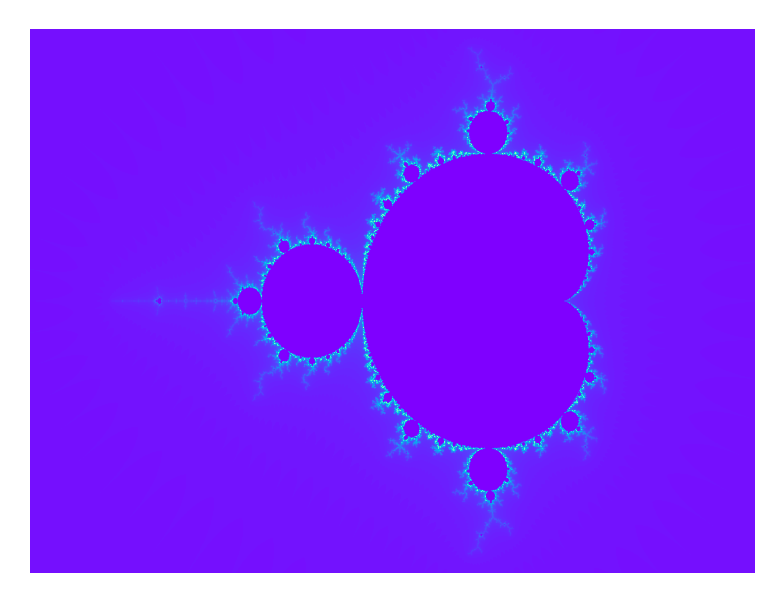

In [46]:
plt.figure(figsize=(3.200, 2.400), dpi=300)
img = plt.imshow(result)
img.set_cmap('rainbow')
plt.axis('off')
#plt.savefig('myfig.png', dpi=300)